In [ ]:
!pip install pickle5

In [ ]:
import pandas as pd
import numpy as np
import pickle5 as pickle
import itertools

#Data that I parsed. Analysys and cleaning are needed.

In [ ]:
with open('stories_pandas_df.pkl', 'rb') as file:
  df = pickle.load(file)
df

,name,author,categories,body/story,likesNumber,commentsNumber,timestamp of scraping,url
0,No Hard Feelings,A.dot Ram,"Drama, Science Fiction, Speculative","Dear Winston,\nBy the time you’re reading this...",251,131,2020-11-16T13:51:25.961554,https://blog.reedsy.com/creative-writing-promp...
1,3:00 A.M.,Alby Carter,"Contemporary, Drama, Lesbian","It’s late, and my head still hurts from the fi...",140,65,2020-11-16T13:51:26.814869,https://blog.reedsy.com/creative-writing-prom...
2,The Population,Julia Boddie,"Fiction, Science Fiction, Kids",They rushed him to the hospital. Timothy laid ...,83,31,2020-11-16T13:51:27.692685,https://blog.reedsy.com/creative-writing-prom...
3,That Night,Eliza Ane,"Thriller, Suspense",The door slammed against the wall as she threw...,82,79,2020-11-16T13:51:28.563709,https://blog.reedsy.com/creative-writing-prom...
4,A savior?,B. W.,"Adventure, Fantasy",This has something to do with the novel that i...,72,260,2020-11-16T13:51:29.870689,https://blog.reedsy.com/creative-writing-prom...
...,...,...,...,...,...,...,...,...
4140,A Different Kind Of Ophalim,Azalea Young,"Fantasy, Fiction",Of Important Note:\nWith the creation of Yalib...,0,0,2021-02-03T23:41:12.424204,https://blog.reedsy.com/creative-writing-prom...
4141,The Miracle Maker,Reija Sillanpaa,"Fiction, Sad","TW: sexual abuse, familial abuse\n\nMy super-s...",0,0,2021-02-03T23:41:13.191278,https://blog.reedsy.com/creative-writing-prom...
4142,She Listens,Da. Blackmore,Sad,Tears.\nShe steps into the schoolyard silently...,0,0,2021-02-03T23:41:13.949157,https://blog.reedsy.com/creative-writing-prom...
4143,"Someone given a second chance, is someone give...",Nokwazi Mokoena,"Coming of Age, Fiction, Inspirational",I cannot recall what was happening in my head ...,0,0,2021-02-03T23:41:14.786111,https://blog.reedsy.com/creative-writing-prom...


#We have to clean the data. If a sample has no category at all -- we remove the sample from the dataset.

In [ ]:
df.replace('', np.nan, regex=True, inplace=True)
df = df.dropna(subset=['categories']).reset_index(drop=True)
df

,name,author,categories,body/story,likesNumber,commentsNumber,timestamp of scraping,url
0,No Hard Feelings,A.dot Ram,"Drama, Science Fiction, Speculative","Dear Winston,\nBy the time you’re reading this...",251,131,2020-11-16T13:51:25.961554,https://blog.reedsy.com/creative-writing-promp...
1,3:00 A.M.,Alby Carter,"Contemporary, Drama, Lesbian","It’s late, and my head still hurts from the fi...",140,65,2020-11-16T13:51:26.814869,https://blog.reedsy.com/creative-writing-prom...
2,The Population,Julia Boddie,"Fiction, Science Fiction, Kids",They rushed him to the hospital. Timothy laid ...,83,31,2020-11-16T13:51:27.692685,https://blog.reedsy.com/creative-writing-prom...
3,That Night,Eliza Ane,"Thriller, Suspense",The door slammed against the wall as she threw...,82,79,2020-11-16T13:51:28.563709,https://blog.reedsy.com/creative-writing-prom...
4,A savior?,B. W.,"Adventure, Fantasy",This has something to do with the novel that i...,72,260,2020-11-16T13:51:29.870689,https://blog.reedsy.com/creative-writing-prom...
...,...,...,...,...,...,...,...,...
3590,A Different Kind Of Ophalim,Azalea Young,"Fantasy, Fiction",Of Important Note:\nWith the creation of Yalib...,0,0,2021-02-03T23:41:12.424204,https://blog.reedsy.com/creative-writing-prom...
3591,The Miracle Maker,Reija Sillanpaa,"Fiction, Sad","TW: sexual abuse, familial abuse\n\nMy super-s...",0,0,2021-02-03T23:41:13.191278,https://blog.reedsy.com/creative-writing-prom...
3592,She Listens,Da. Blackmore,Sad,Tears.\nShe steps into the schoolyard silently...,0,0,2021-02-03T23:41:13.949157,https://blog.reedsy.com/creative-writing-prom...
3593,"Someone given a second chance, is someone give...",Nokwazi Mokoena,"Coming of Age, Fiction, Inspirational",I cannot recall what was happening in my head ...,0,0,2021-02-03T23:41:14.786111,https://blog.reedsy.com/creative-writing-prom...


In [ ]:
df["author"].value_counts()

Writer Maniac      14
Zilla Babbitt      14
Sara Blanch        12
Joe Swanson        12
Maya W.            10
                   ..
Aria Barnes         1
Sara Bonilla        1
Sunil Varshneya     1
Robert Lent         1
I . H               1
Name: author, Length: 2452, dtype: int64

#We have categories as a string "cat1, cat2, cat3" and we need to replace it with a list [cat1, cat2, cat3].

In [ ]:
df["categories"] = df["categories"].apply(lambda x: x.split(", "))
df

,name,author,categories,body/story,likesNumber,commentsNumber,timestamp of scraping,url
0,No Hard Feelings,A.dot Ram,"[Drama, Science Fiction, Speculative]","Dear Winston,\nBy the time you’re reading this...",251,131,2020-11-16T13:51:25.961554,https://blog.reedsy.com/creative-writing-promp...
1,3:00 A.M.,Alby Carter,"[Contemporary, Drama, Lesbian]","It’s late, and my head still hurts from the fi...",140,65,2020-11-16T13:51:26.814869,https://blog.reedsy.com/creative-writing-prom...
2,The Population,Julia Boddie,"[Fiction, Science Fiction, Kids]",They rushed him to the hospital. Timothy laid ...,83,31,2020-11-16T13:51:27.692685,https://blog.reedsy.com/creative-writing-prom...
3,That Night,Eliza Ane,"[Thriller, Suspense]",The door slammed against the wall as she threw...,82,79,2020-11-16T13:51:28.563709,https://blog.reedsy.com/creative-writing-prom...
4,A savior?,B. W.,"[Adventure, Fantasy]",This has something to do with the novel that i...,72,260,2020-11-16T13:51:29.870689,https://blog.reedsy.com/creative-writing-prom...
...,...,...,...,...,...,...,...,...
3590,A Different Kind Of Ophalim,Azalea Young,"[Fantasy, Fiction]",Of Important Note:\nWith the creation of Yalib...,0,0,2021-02-03T23:41:12.424204,https://blog.reedsy.com/creative-writing-prom...
3591,The Miracle Maker,Reija Sillanpaa,"[Fiction, Sad]","TW: sexual abuse, familial abuse\n\nMy super-s...",0,0,2021-02-03T23:41:13.191278,https://blog.reedsy.com/creative-writing-prom...
3592,She Listens,Da. Blackmore,[Sad],Tears.\nShe steps into the schoolyard silently...,0,0,2021-02-03T23:41:13.949157,https://blog.reedsy.com/creative-writing-prom...
3593,"Someone given a second chance, is someone give...",Nokwazi Mokoena,"[Coming of Age, Fiction, Inspirational]",I cannot recall what was happening in my head ...,0,0,2021-02-03T23:41:14.786111,https://blog.reedsy.com/creative-writing-prom...


#To analyze the categories existing in the dataset.

In [ ]:
categories = itertools.chain(*df["categories"].tolist())
categories_df = pd.DataFrame(categories, columns=["category"])
categories_df.value_counts()

category           
Fiction                1199
Drama                   792
Fantasy                 523
Romance                 493
Mystery                 463
Sad                     421
Suspense                370
Contemporary            336
Funny                   313
Thriller                310
Adventure               309
Christmas               308
Science Fiction         306
Inspirational           268
Friendship              260
Holiday                 248
Crime                   210
Teens & Young Adult     207
Coming of Age           186
Happy                   151
Creative Nonfiction     151
Speculative             147
American                115
Horror                  110
LGBTQ+                   72
Kids                     69
Historical Fiction       68
Christian                54
High School              46
Bedtime                  44
Urban Fantasy            41
African American         36
Gay                      32
Black                    25
Lesbian                  24


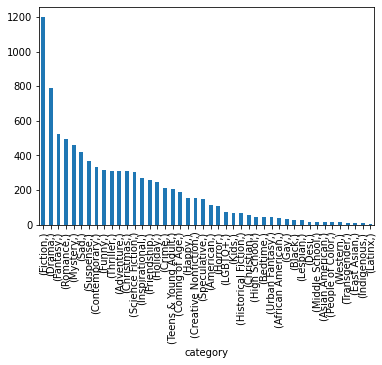

In [ ]:
categories_df.value_counts().plot(kind='bar')

#As our classes are highly imbalanced we remove categories that are represented by less than 100 samples, i.e. consider them being irregular and irrelative as a noise.

In [ ]:
list_of_categories = categories_df["category"].to_list()

counts = dict()
for i in list_of_categories:
  counts[i] = counts.get(i, 0) + 1

print(sorted(counts.items(), key=lambda item: item[1], reverse=True)[:10])

categories_to_drop = {k: v for k, v in counts.items() if v < 100}
categories_to_drop = set(categories_to_drop)
print(categories_to_drop)

[('Fiction', 1199), ('Drama', 792), ('Fantasy', 523), ('Romance', 493), ('Mystery', 463), ('Sad', 421), ('Suspense', 370), ('Contemporary', 336), ('Funny', 313), ('Thriller', 310)]
{'Black', 'Middle School', 'LGBTQ+', 'People of Color', 'Urban Fantasy', 'Christian', 'Gay', 'Transgender', 'High School', 'Lesbian', 'African American', 'Western', 'East Asian', 'Asian American', 'Kids', 'Historical Fiction', 'Bedtime', 'Desi', 'Latinx', 'Indigenous'}


Removal from the main dataframe itself.

In [ ]:
def remove_redundant_categories(cats):
  return [cat for cat in cats if cat not in categories_to_drop]

df["categories"] = df["categories"].apply(lambda cats: remove_redundant_categories(cats))
df[260:261]

,name,author,categories,body/story,likesNumber,commentsNumber,timestamp of scraping,url
260,Destiny,Anjali Roy,[],"Raghav, the go-getting young man in her hobby ...",10,1,2020-11-16T13:55:01.505172,https://blog.reedsy.com/creative-writing-prom...


#Remove a sample if it has no categories at all after the last step.

In [ ]:
df = df[df['categories'].map(lambda d: len(d)) > 0].reset_index(drop=True)
df

,name,author,categories,body/story,likesNumber,commentsNumber,timestamp of scraping,url
0,No Hard Feelings,A.dot Ram,"[Drama, Science Fiction, Speculative]","Dear Winston,\nBy the time you’re reading this...",251,131,2020-11-16T13:51:25.961554,https://blog.reedsy.com/creative-writing-promp...
1,3:00 A.M.,Alby Carter,"[Contemporary, Drama]","It’s late, and my head still hurts from the fi...",140,65,2020-11-16T13:51:26.814869,https://blog.reedsy.com/creative-writing-prom...
2,The Population,Julia Boddie,"[Fiction, Science Fiction]",They rushed him to the hospital. Timothy laid ...,83,31,2020-11-16T13:51:27.692685,https://blog.reedsy.com/creative-writing-prom...
3,That Night,Eliza Ane,"[Thriller, Suspense]",The door slammed against the wall as she threw...,82,79,2020-11-16T13:51:28.563709,https://blog.reedsy.com/creative-writing-prom...
4,A savior?,B. W.,"[Adventure, Fantasy]",This has something to do with the novel that i...,72,260,2020-11-16T13:51:29.870689,https://blog.reedsy.com/creative-writing-prom...
...,...,...,...,...,...,...,...,...
3560,A Different Kind Of Ophalim,Azalea Young,"[Fantasy, Fiction]",Of Important Note:\nWith the creation of Yalib...,0,0,2021-02-03T23:41:12.424204,https://blog.reedsy.com/creative-writing-prom...
3561,The Miracle Maker,Reija Sillanpaa,"[Fiction, Sad]","TW: sexual abuse, familial abuse\n\nMy super-s...",0,0,2021-02-03T23:41:13.191278,https://blog.reedsy.com/creative-writing-prom...
3562,She Listens,Da. Blackmore,[Sad],Tears.\nShe steps into the schoolyard silently...,0,0,2021-02-03T23:41:13.949157,https://blog.reedsy.com/creative-writing-prom...
3563,"Someone given a second chance, is someone give...",Nokwazi Mokoena,"[Coming of Age, Fiction, Inspirational]",I cannot recall what was happening in my head ...,0,0,2021-02-03T23:41:14.786111,https://blog.reedsy.com/creative-writing-prom...


#Repeat plotting to compare what we've done so far.

In [ ]:
categories = itertools.chain(*df["categories"].tolist())
categories_df = pd.DataFrame(categories, columns=["category"])
categories_df.value_counts()

category           
Fiction                1199
Drama                   792
Fantasy                 523
Romance                 493
Mystery                 463
Sad                     421
Suspense                370
Contemporary            336
Funny                   313
Thriller                310
Adventure               309
Christmas               308
Science Fiction         306
Inspirational           268
Friendship              260
Holiday                 248
Crime                   210
Teens & Young Adult     207
Coming of Age           186
Happy                   151
Creative Nonfiction     151
Speculative             147
American                115
Horror                  110
dtype: int64

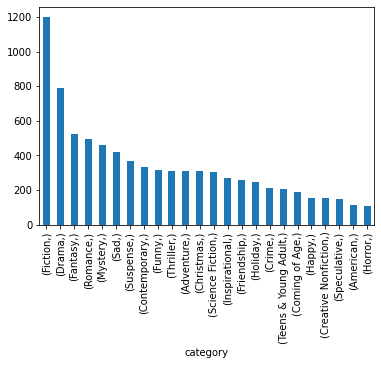

In [ ]:
categories_df.value_counts().plot(kind='bar')

#Make all possible categories in the dataset as one-hot encoding.

In [ ]:
category_names = categories_df['category'].unique().tolist()
print("Quantity of categories:")
print(category_names)
print(len(category_names))
categories = pd.get_dummies(category_names)
categories.head(10)

Quantity of categories:
['Drama', 'Science Fiction', 'Speculative', 'Contemporary', 'Fiction', 'Thriller', 'Suspense', 'Adventure', 'Fantasy', 'Coming of Age', 'Crime', 'Mystery', 'Funny', 'Sad', 'Horror', 'Romance', 'Friendship', 'Inspirational', 'American', 'Teens & Young Adult', 'Holiday', 'Happy', 'Creative Nonfiction', 'Christmas']
24


,Adventure,American,Christmas,Coming of Age,Contemporary,Creative Nonfiction,Crime,Drama,Fantasy,Fiction,Friendship,Funny,Happy,Holiday,Horror,Inspirational,Mystery,Romance,Sad,Science Fiction,Speculative,Suspense,Teens & Young Adult,Thriller
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#A function that allows us to make vector encoding in the categories above. And a simple example.

In [ ]:
def encode_categories_into_vector(categs):
  one_hot_vectors = [categories[x] for x in categs]
  y_onehot = list(map(sum, zip(*one_hot_vectors)))

  return y_onehot

print(df.loc[10]['categories'])
encode_categories_into_vector(df.loc[10]['categories'])

['Mystery', 'Suspense', 'Thriller']


[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#Make this one-hot encoding for all rows in the dataframe.

In [ ]:
df["categories"] = df["categories"].apply(lambda x: encode_categories_into_vector(x))
df['categories'].head()

0    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...
Name: categories, dtype: object

In [ ]:
df.to_pickle("./cleaned_dataset_df.pkl")